In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from math import sqrt
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
import matplotlib.pyplot as plt

In [2]:
# Uploaded the saved text file from my drive
GDP_Rate = pd.read_csv('rawdata_210.txt',sep="\t", header=None,index_col=0)
GDP_Rate.head()

,1,2,3
0,,,
1,Libya,64.0,2017 est.
2,Northern Mariana Islands,28.6,2016 est.
3,Falkland Islands (Islas Malvinas),25.5,2015 est.
4,Turks and Caicos Islands,11.2,2007 est.
5,Ethiopia,10.9,2017 est.


In [3]:
GDP_Rate.columns = ['Country', 'GDP_Rate', 'drop']
GDP_Rate.drop(['drop'], axis=1, inplace=True)
GDP_Rate.head()

,Country,GDP_Rate
0,,
1,Libya,64.0
2,Northern Mariana Islands,28.6
3,Falkland Islands (Islas Malvinas),25.5
4,Turks and Caicos Islands,11.2
5,Ethiopia,10.9


In [4]:
pop_df = pd.read_csv('rawdata_335.txt',sep="\t", header=None)
pop_df.columns = ['Country', 'Population']

In [5]:
pd.merge(pop_df, GDP_Rate,on='Country')

,Country,Population,GDP_Rate
0,China,"1,384,688,986",6.9
1,India,"1,296,834,042",6.7
2,United States,"329,256,465",2.2
3,Indonesia,"262,787,403",5.1
4,Brazil,"208,846,892",1.0
5,Pakistan,"207,862,518",5.4
6,Nigeria,"203,452,505",0.8
7,Bangladesh,"159,453,001",7.4
8,Russia,"142,122,776",1.5
9,Japan,"126,168,156",1.7


In [6]:
med_df = pd.read_csv('rawdata_343.txt',sep="\t", header=None)
med_df.columns = ['Country', 'Median_Age']


In [7]:
df_merge = pd.merge(pop_df, med_df, on='Country', how='left')

In [8]:
med_df['Country'][0]

'    Monaco'

In [9]:
med_df['Country'] = med_df['Country'].str.strip(' ')

In [10]:
df_merge = pd.merge(pop_df, med_df, on='Country', how='left')
df_merge.shape

(238, 3)

In [11]:
df_merge.head()

,Country,Population,Median_Age
0,China,"1,384,688,986",37.7
1,India,"1,296,834,042",28.1
2,United States,"329,256,465",38.2
3,Indonesia,"262,787,403",30.5
4,Brazil,"208,846,892",32.4


In [12]:
GDP_Rate_merge = pd.merge(df_merge, GDP_Rate, on='Country', how='left')
GDP_Rate_merge.head()

,Country,Population,Median_Age,GDP_Rate
0,China,"1,384,688,986",37.7,6.9
1,India,"1,296,834,042",28.1,6.7
2,United States,"329,256,465",38.2,2.2
3,Indonesia,"262,787,403",30.5,5.1
4,Brazil,"208,846,892",32.4,1.0


In [13]:
df_merge = GDP_Rate_merge

In [14]:
Birth_df = pd.read_csv('BirthRate.txt',sep="\t", header=None)
Birth_df.head()

,0,1,2,3
0,1,Angola,43.7,2018 est.
1,2,Niger,43.6,2018 est.
2,3,Mali,43.2,2018 est.
3,4,Cha,43.0,2018 est.
4,5,Uganda,42.4,2018 est.


In [15]:
Birth_df = Birth_df[[1,2,3]]
Birth_df = Birth_df[[1,2]]
Birth_df.head()

,1,2
0,Angola,43.7
1,Niger,43.6
2,Mali,43.2
3,Cha,43.0
4,Uganda,42.4


In [16]:
Birth_df.columns = ['Country', 'Birth_Rate']
Birth_df.head()

,Country,Birth_Rate
0,Angola,43.7
1,Niger,43.6
2,Mali,43.2
3,Cha,43.0
4,Uganda,42.4


In [17]:
df_merge = pd.merge(df_merge, Birth_df, on='Country', how='left')
df_merge.head()

,Country,Population,Median_Age,GDP_Rate,Birth_Rate
0,China,"1,384,688,986",37.7,6.9,12.1
1,India,"1,296,834,042",28.1,6.7,18.7
2,United States,"329,256,465",38.2,2.2,12.4
3,Indonesia,"262,787,403",30.5,5.1,15.9
4,Brazil,"208,846,892",32.4,1.0,13.9


In [18]:
Death = pd.read_csv('DeathRate.txt',sep="\t", header=None)
Death.head()

,0,1,2,3
0,1,South Sudan,19.3,2018 est.
1,2,Lesotho,15.1,2018 est.
2,3,Lithuania,14.8,2018 est.
3,4,Bulgaria,14.5,2018 est.
4,5,Latvia,14.5,2018 est.


In [19]:
Death = Death[[1,2,3]]
Death = Death[[1,2]]
Death.head()

,1,2
0,South Sudan,19.3
1,Lesotho,15.1
2,Lithuania,14.8
3,Bulgaria,14.5
4,Latvia,14.5


In [23]:
Death.columns = ['Country', 'Death_Rate']
Death.head()

,Country,Death_Rate
0,South Sudan,19.3
1,Lesotho,15.1
2,Lithuania,14.8
3,Bulgaria,14.5
4,Latvia,14.5


In [25]:
Death_merge = pd.merge(df_merge, Death, on='Country', how='left')

In [26]:
Death_merge.head()

,Country,Population,Median_Age,GDP_Rate,Birth_Rate,Death_Rate
0,China,"1,384,688,986",37.7,6.9,12.1,8.0
1,India,"1,296,834,042",28.1,6.7,18.7,7.3
2,United States,"329,256,465",38.2,2.2,12.4,8.2
3,Indonesia,"262,787,403",30.5,5.1,15.9,6.5
4,Brazil,"208,846,892",32.4,1.0,13.9,6.7


In [27]:
Education_Rate = pd.read_csv('Education Rate.txt',sep="\t", header=None)

In [28]:
Education_Rate = Education_Rate[[1,2,3]]
Education_Rate = Education_Rate[[1,2]]
Education_Rate.head()

,1,2
0,Cuba,12.8
1,"Micronesia, Federated States of",12.5
2,Grenada,10.3
3,Solomon Islands,9.9
4,Botswana,9.6


In [29]:
Education_Rate.columns = ['Country', 'Education_Rate']
Education_Rate.head()

,Country,Education_Rate
0,Cuba,12.8
1,"Micronesia, Federated States of",12.5
2,Grenada,10.3
3,Solomon Islands,9.9
4,Botswana,9.6


In [30]:
Education_Rate_merge = pd.merge(df_merge, Education_Rate, on='Country', how='left')
Education_Rate_merge.head()

,Country,Population,Median_Age,GDP_Rate,Birth_Rate,Education_Rate
0,China,"1,384,688,986",37.7,6.9,12.1,NaN
1,India,"1,296,834,042",28.1,6.7,18.7,3.8
2,United States,"329,256,465",38.2,2.2,12.4,5.0
3,Indonesia,"262,787,403",30.5,5.1,15.9,3.6
4,Brazil,"208,846,892",32.4,1.0,13.9,6.2


In [31]:
Public_Debt = pd.read_csv('public debt.txt',sep="\t", header=None)

In [32]:
Public_Debt = Public_Debt[[1,2,3]]
Public_Debt = Public_Debt[[1,2]]
Public_Debt.head()

,1,2
0,Japan,237.6
1,Greece,181.8
2,Barbados,157.3
3,Lebanon,146.8
4,Italy,131.8


In [33]:
Public_Debt.columns = ['Country', 'Public_Debt']
Public_Debt.head()

,Country,Public_Debt
0,Japan,237.6
1,Greece,181.8
2,Barbados,157.3
3,Lebanon,146.8
4,Italy,131.8


In [34]:
Public_Debt_merge = pd.merge(Education_Rate_merge, Public_Debt, on='Country', how='left')
Public_Debt_merge.head()

,Country,Population,Median_Age,GDP_Rate,Birth_Rate,Education_Rate,Public_Debt
0,China,"1,384,688,986",37.7,6.9,12.1,NaN,47.0
1,India,"1,296,834,042",28.1,6.7,18.7,3.8,71.2
2,United States,"329,256,465",38.2,2.2,12.4,5.0,78.8
3,Indonesia,"262,787,403",30.5,5.1,15.9,3.6,28.8
4,Brazil,"208,846,892",32.4,1.0,13.9,6.2,84.0


In [35]:
Health_Expend = pd.read_csv('Health Expend.txt',sep="\t", header=None)

In [36]:
Health_Expend = Health_Expend[[0,1,2]]
Health_Expend = Health_Expend[[0,1]]
Health_Expend.head()

,0,1
0,Marshall Islands,17.1
1,United States,17.1
2,Tuvalu,16.5
3,Maldives,13.7
4,"Micronesia, Federated States of",13.7


In [37]:
Health_Expend.columns = ['Country', 'Health_Expend']
Health_Expend.head()

,Country,Health_Expend
0,Marshall Islands,17.1
1,United States,17.1
2,Tuvalu,16.5
3,Maldives,13.7
4,"Micronesia, Federated States of",13.7


In [38]:
Health_Expend_merge = pd.merge(Public_Debt_merge, Health_Expend, on='Country', how='left')

In [39]:
Health_Expend['Country'][0]

' Marshall Islands'

In [40]:
Health_Expend['Country'] = Health_Expend['Country'].str.strip(' ')

In [41]:
Health_Expend.head()

,Country,Health_Expend
0,Marshall Islands,17.1
1,United States,17.1
2,Tuvalu,16.5
3,Maldives,13.7
4,"Micronesia, Federated States of",13.7


In [42]:
Fertility_Rate = pd.read_csv('Fertility Rate.txt',sep="\t", header=None)

In [43]:
Fertility_Rate = Fertility_Rate[[0,1,2]]
Fertility_Rate = Fertility_Rate[[0,1]]
Fertility_Rate.head()

,0,1
0,Niger,6.35
1,Angola,6.09
2,Burundi,5.93
3,Chad,5.90
4,Mali,5.90


In [44]:
Fertility_Rate.columns = ['Country', 'Fertility_Rate']
Fertility_Rate.head()

,Country,Fertility_Rate
0,Niger,6.35
1,Angola,6.09
2,Burundi,5.93
3,Chad,5.90
4,Mali,5.90


In [45]:
Fertility_Rate_merge = pd.merge(Health_Expend_merge, Fertility_Rate, on='Country', how='left')

In [46]:
Table = Fertility_Rate_merge

In [47]:
Table.head()

,Country,Population,Median_Age,GDP_Rate,Birth_Rate,Education_Rate,Public_Debt,Health_Expend,Fertility_Rate
0,China,"1,384,688,986",37.7,6.9,12.1,NaN,47.0,NaN,1.60
1,India,"1,296,834,042",28.1,6.7,18.7,3.8,71.2,NaN,2.40
2,United States,"329,256,465",38.2,2.2,12.4,5.0,78.8,NaN,1.87
3,Indonesia,"262,787,403",30.5,5.1,15.9,3.6,28.8,NaN,2.08
4,Brazil,"208,846,892",32.4,1.0,13.9,6.2,84.0,NaN,1.75


In [48]:
Table['Population'][0].replace(',', '')

'1384688986'

In [49]:
Table['Population']=Fertility_Rate_merge['Population'].str.replace(',', '').astype(float)

In [50]:
Table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 237
Data columns (total 9 columns):
Country           238 non-null object
Population        238 non-null float64
Median_Age        228 non-null float64
GDP_Rate          224 non-null float64
Birth_Rate        217 non-null float64
Education_Rate    167 non-null float64
Public_Debt       201 non-null float64
Health_Expend     0 non-null float64
Fertility_Rate    224 non-null float64
dtypes: float64(8), object(1)
memory usage: 28.6+ KB


In [69]:
Table.isnull().sum()

Country           0
Population        0
Median_Age        0
GDP_Rate          0
Birth_Rate        0
Education_Rate    0
Public_Debt       0
Health_Expend     0
Fertility_Rate    0
dtype: int64

In [70]:
Table = Table.fillna(0)

In [71]:
Table.head()

,Country,Population,Median_Age,GDP_Rate,Birth_Rate,Education_Rate,Public_Debt,Health_Expend,Fertility_Rate
0,China,1.384689e+09,37.7,6.9,12.1,0.0,47.0,0.0,1.60
1,India,1.296834e+09,28.1,6.7,18.7,3.8,71.2,0.0,2.40
2,United States,3.292565e+08,38.2,2.2,12.4,5.0,78.8,0.0,1.87
3,Indonesia,2.627874e+08,30.5,5.1,15.9,3.6,28.8,0.0,2.08
4,Brazil,2.088469e+08,32.4,1.0,13.9,6.2,84.0,0.0,1.75


In [72]:
Table.columns

Index(['Country', 'Population', 'Median_Age', 'GDP_Rate', 'Birth_Rate',
       'Education_Rate', 'Public_Debt', 'Health_Expend', 'Fertility_Rate'],
      dtype='object')

In [73]:
Table.describe()

,Population,Median_Age,GDP_Rate,Birth_Rate,Education_Rate,Public_Debt,Health_Expend,Fertility_Rate
count,2.380000e+02,238.000000,238.000000,238.000000,238.000000,238.000000,238.0,238.000000
mean,3.153346e+07,29.691597,2.930252,17.282353,3.227311,45.591176,0.0,2.363277
std,1.281148e+08,10.756653,6.216088,10.382423,2.636111,36.709839,0.0,1.306096
min,5.400000e+01,0.000000,-36.500000,0.000000,0.000000,0.000000,0.0,0.000000
25%,3.353550e+05,22.575000,1.300000,10.525000,0.000000,20.900000,0.0,1.612500
50%,5.391602e+06,30.000000,2.850000,15.300000,3.500000,40.250000,0.0,1.990000
75%,1.981760e+07,38.200000,4.675000,23.200000,5.100000,63.900000,0.0,2.800000
max,1.384689e+09,53.800000,64.000000,43.700000,12.800000,237.600000,0.0,6.350000


In [74]:
Table.corr()

,Population,Median_Age,GDP_Rate,Birth_Rate,Education_Rate,Public_Debt,Health_Expend,Fertility_Rate
Population,1.000000,0.033304,0.064899,0.014403,-0.023825,0.082563,NaN,0.006265
Median_Age,0.033304,1.000000,-0.011123,-0.477162,0.135611,0.119736,NaN,-0.401883
GDP_Rate,0.064899,-0.011123,1.000000,0.014456,-0.025133,-0.082189,NaN,-0.023969
Birth_Rate,0.014403,-0.477162,0.014456,1.000000,0.156728,0.218259,NaN,0.907500
Education_Rate,-0.023825,0.135611,-0.025133,0.156728,1.000000,0.310505,NaN,0.066232
Public_Debt,0.082563,0.119736,-0.082189,0.218259,0.310505,1.000000,NaN,0.155547
Health_Expend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fertility_Rate,0.006265,-0.401883,-0.023969,0.907500,0.066232,0.155547,NaN,1.000000


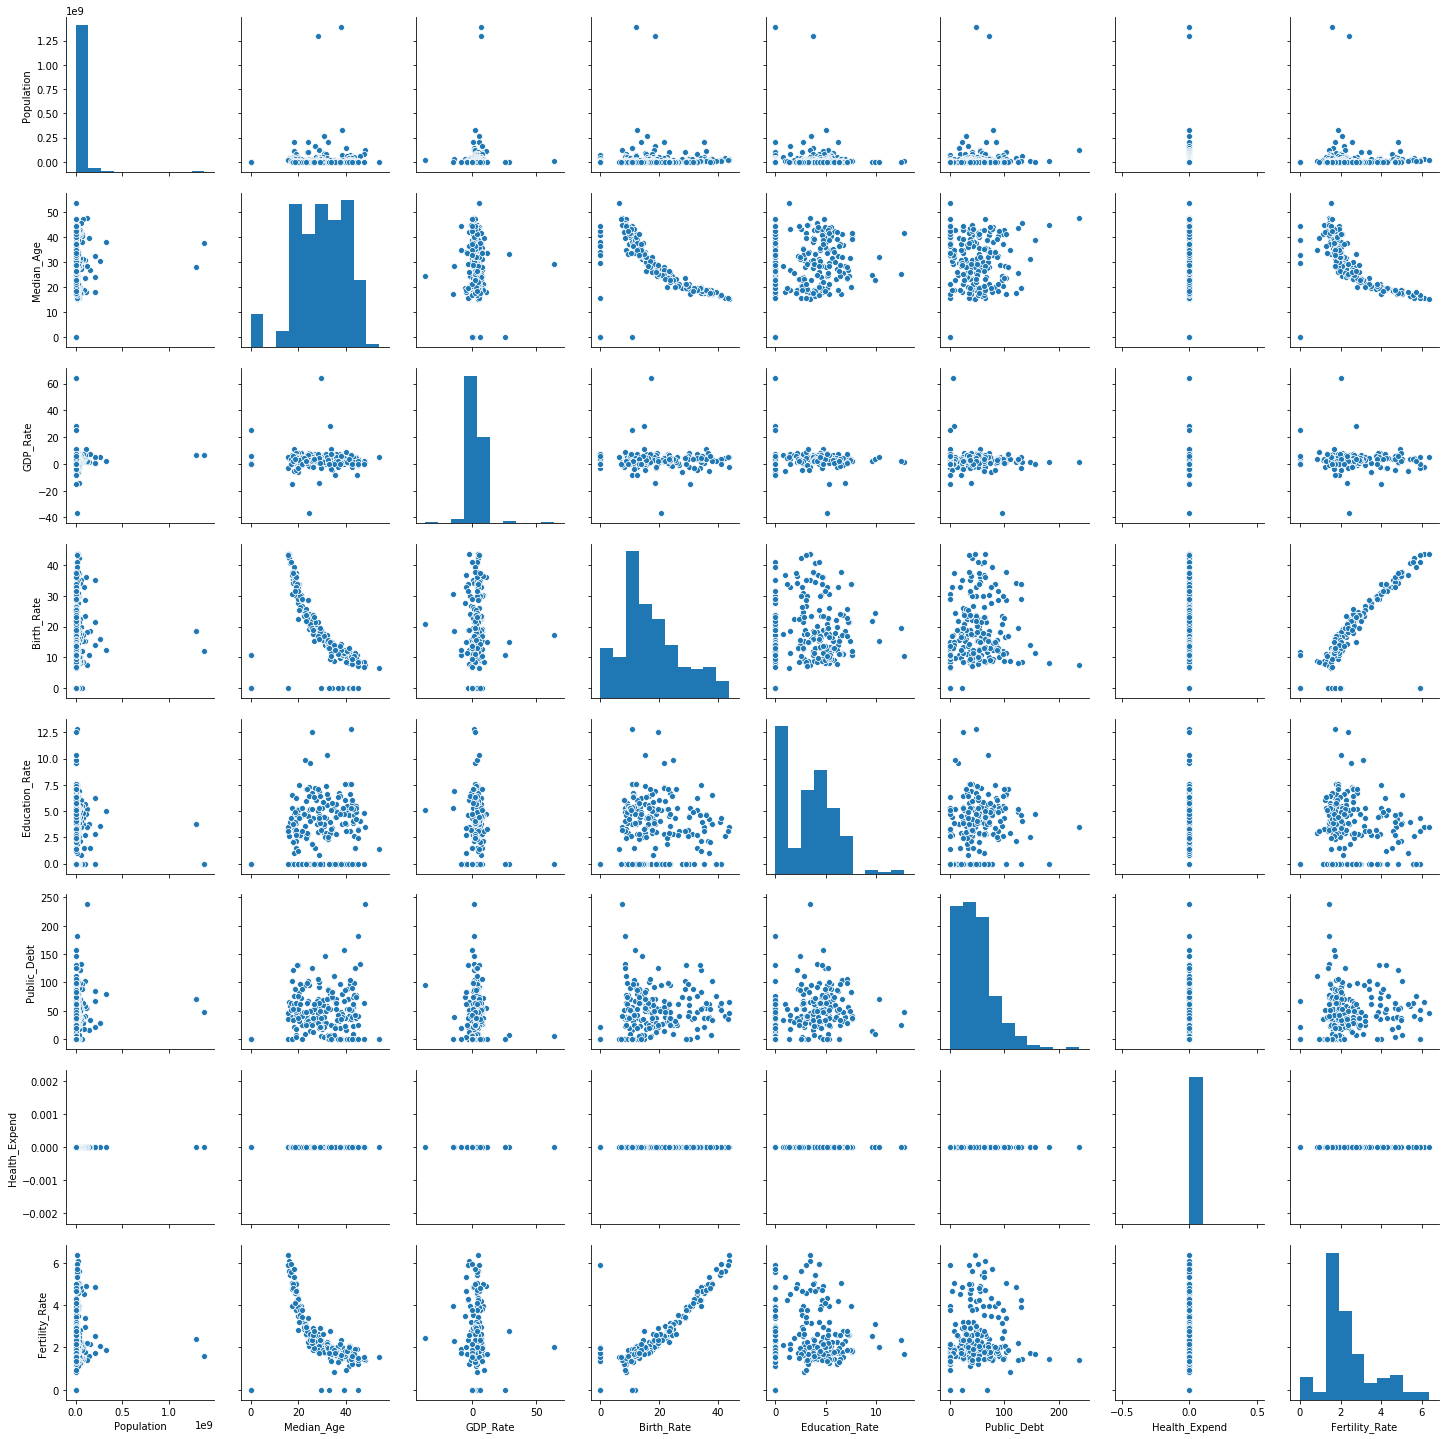

In [57]:
sns.pairplot(Table)

In [61]:
X = Table.filter(['Population', 'Median_Age', 'GDP_Rate',
       'Death_Rate', 'Education_Rate', 'Public_Debt', 'Health_Expend',
       'Fertility_Rate'], axis=1)
y = Table.filter(['Fertility_Rate'], axis=1)

In [62]:
lr_single_model = ols(formula='Fertility_Rate~Population+Median_Age+GDP_Rate+Death_Rate+Education_Rate+Public_Debt+Health_Expend',data= Fertility_Rate).fit()
lr_single_model.summary()

PatsyError: Error evaluating factor: NameError: name 'Population' is not defined
    Fertility_Rate~Population+Median_Age+GDP_Rate+Death_Rate+Education_Rate+Public_Debt+Health_Expend
                   ^^^^^^^^^^

In [ ]:
lr_single_model = ols(formula='Fertility_Rate~Education_Rate+Public_Debt+Birth_Rate+Health_Expend+GDP_Rate', data=Fertility_Rate).fit()
lr_single_model.summary()

In [ ]:
import scipy.stats as stats
residuals = lr_single_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(Data.corr())

In [ ]:
Test = Table[Table['Fertility_Rate'] > 0]
Test.head()

In [ ]:
Test.sort_values('Fertility_Rate')

In [ ]:
Data1 = Test.sort_values('Fertility_Rate', ascending=True)

In [ ]:
Data2 = Data1[:15].plot(kind ='bar', x='Country', y='Fertility_Rate',figsize=(18,10) ,fontsize=25)
Data2.set_ylabel("Fertility_Rate",fontsize=28)
Data2.set_title("Countries with low Fertility Rate",fontsize=33)

In [ ]:
Data3 = Test.sort_values('Fertility_Rate', ascending=False)

In [ ]:
Data2 = Data3[:15].plot(kind ='bar', x='Country', y='Fertility_Rate',figsize=(18,10) ,fontsize=25)
Data2.set_ylabel("Fertility_Rate",fontsize=28)
Data2.set_title("Countries with Highest Fertility Rate",fontsize=33)

In [ ]:
sns.regplot(x=Data['Fertility_Rate'], y=Data['GDP_Rate'], data=Data)

In [ ]:
sns.regplot(x=Data['Birth_Rate'], y=Data['Fertility_Rate'], data=Data)

In [ ]:
sns.regplot(x=Data['Fertility_Rate'], y=Data['Health_Expend'], data=Data)